# Analysis 3 : Goal Scorers

In [13]:
import pandas as pd
import numpy as np
import json
from collections import Counter
import operator
from ast import literal_eval
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%pylab inline
import httplib

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [14]:
data = pd.read_csv('./data/2002-2012-EPL.csv')

In [15]:
data_refined = data[~data.home_scorers.str.contains(',og', na=False)]
data_refined = data_refined[~data_refined.away_scorers.str.contains(',og', na=False)]
data_refined = data_refined.reset_index(drop = True)

In [ ]:
goal_scorers = pd.DataFrame(columns = ['home_team','home_score','home_scorers','away_team','away_score','away_scorers'], 
                          index = np.arange(0,len(data_refined),1))

goal_scorers.home_team = data_refined.home_team
goal_scorers.away_team = data_refined.away_team
goal_scorers.home_score = data_refined.home_score
goal_scorers.away_score = data_refined.away_score

for i in range(len(goal_scorers)):


    goal_scorers.home_scorers[i] = []
    goal_scorers.away_scorers[i] = []
    
      
    if data_refined.home_score[i]:
        
        for j in range(int(goal_scorers.home_score[i])):
            
            if type(data_splitted_home[2*j][i]) == str: 

                goal_scorers.home_scorers[i].append(data_splitted_home[2*j][i].split(';')[-1].split(' ')[-1])

            
            
    if data_refined.away_score[i]:
        
        for j in range(int(goal_scorers.away_score[i])):
            
            if type(data_splitted_away[2*j][i]) == str:
                
                goal_scorers.away_scorers[i].append(data_splitted_away[2*j][i].split(';')[-1].split(' ')[-1])


In [ ]:
# save the result in a csv format.

goal_scorers.to_csv('./data/goal_scorers.csv')

In [16]:
goal_scorers = pd.read_csv('./data/goal_scorers.csv')

In [17]:
team_scorers = {}

for i in data_refined.home_team.unique():   #same as away
    
    df_home = goal_scorers[goal_scorers.home_team == i]
    df_home = df_home.reset_index(drop = True)
    df_home = df_home.drop(['Unnamed: 0'], 1)

    df_away = goal_scorers[goal_scorers.away_team == i]
    df_away = df_away.reset_index(drop = True)
    df_away = df_away.drop(['Unnamed: 0'], 1)
    
 
    team_scorers.setdefault(i,{})
    
    
    for j in range(len(df_home)):
        temp = literal_eval(df_home.home_scorers[j])
        for k in range(len(temp)):
            team_scorers[i].setdefault(temp[k],0)
            team_scorers[i][temp[k]]+=1
            
    for jj in range(len(df_away)):
        temp = literal_eval(df_away.away_scorers[jj])
        for kk in range(len(temp)):
            team_scorers[i].setdefault(temp[kk],0)
            team_scorers[i][temp[kk]]+=1


In [6]:
# save the dictionary in a json format.

with open('./data/team_all_scorers.json', 'w') as outfile:
    json.dump(team_scorers, outfile)

In [18]:
with open('./data/team_all_scorers.txt') as json_data:
    d = json.load(json_data)

In [19]:
# find the top scorer of each club.

team_top_scorer = {}

for i in team_scorers:
    team_top_scorer.setdefault(i,{})
    key_val = [(max(team_scorers[i], key=team_scorers[i].get), max(team_scorers[i].values()))]
    team_top_scorer[i] = dict(key_val)

In [20]:
temp1 = {}
for i in team_top_scorer:
    team = team_top_scorer[i]
    val = team.values()
    temp1[i] = val[0]
temp2 = sorted(temp1, key = temp1.get, reverse=True)
top_scorer_sorted = {}
for i in range(len(temp1)):
    top_scorer_sorted[temp2[i]] = temp1[temp2[i]]
team_top_scorer

{'Arsenal': {'Henry': 132},
 'Aston Villa': {'Agbonlahor': 58},
 'Birmingham': {'Forssell': 20},
 'Blackburn Rovers': {'McCarthy': 34},
 'Blackpool': {'Campbell': 12},
 'Bolton Wanderers': {'Davies': 68},
 'Burnley': {'Fletcher': 8},
 'Charlton Athletic': {'Euell': 32},
 'Chelsea': {'Lampard': 135},
 'Crystal Palace': {'Johnson': 20},
 'Derby County': {'Christie': 9},
 'Everton': {'Cahill': 49},
 'Fulham': {'Dempsey': 47},
 'Hull City': {'Geovanni': 9},
 'Ipswich Town': {'Bent': 10},
 'Leeds United': {'Viduka': 40},
 'Leicester City': {'Dickov': 12},
 'Liverpool': {'Gerrard': 92},
 'Manchester City': {'Tevez': 57},
 'Manchester United': {'Rooney': 139},
 'Middlesboro': {'Viduka': 24},
 'Newcastle United': {'Shearer': 74},
 'Norwich City': {'Holt': 22},
 'Portsmouth': {'Ayegbeni': 23},
 'Queens Park Rangers': {'Helguson': 8},
 'Reading': {'Doyle': 14},
 'Sheffield United': {'Hulse': 7},
 'Southampton': {'Beattie': 48},
 'Stoke City': {'Walters': 26},
 'Sunderland': {'Bent': 29},
 'Swans

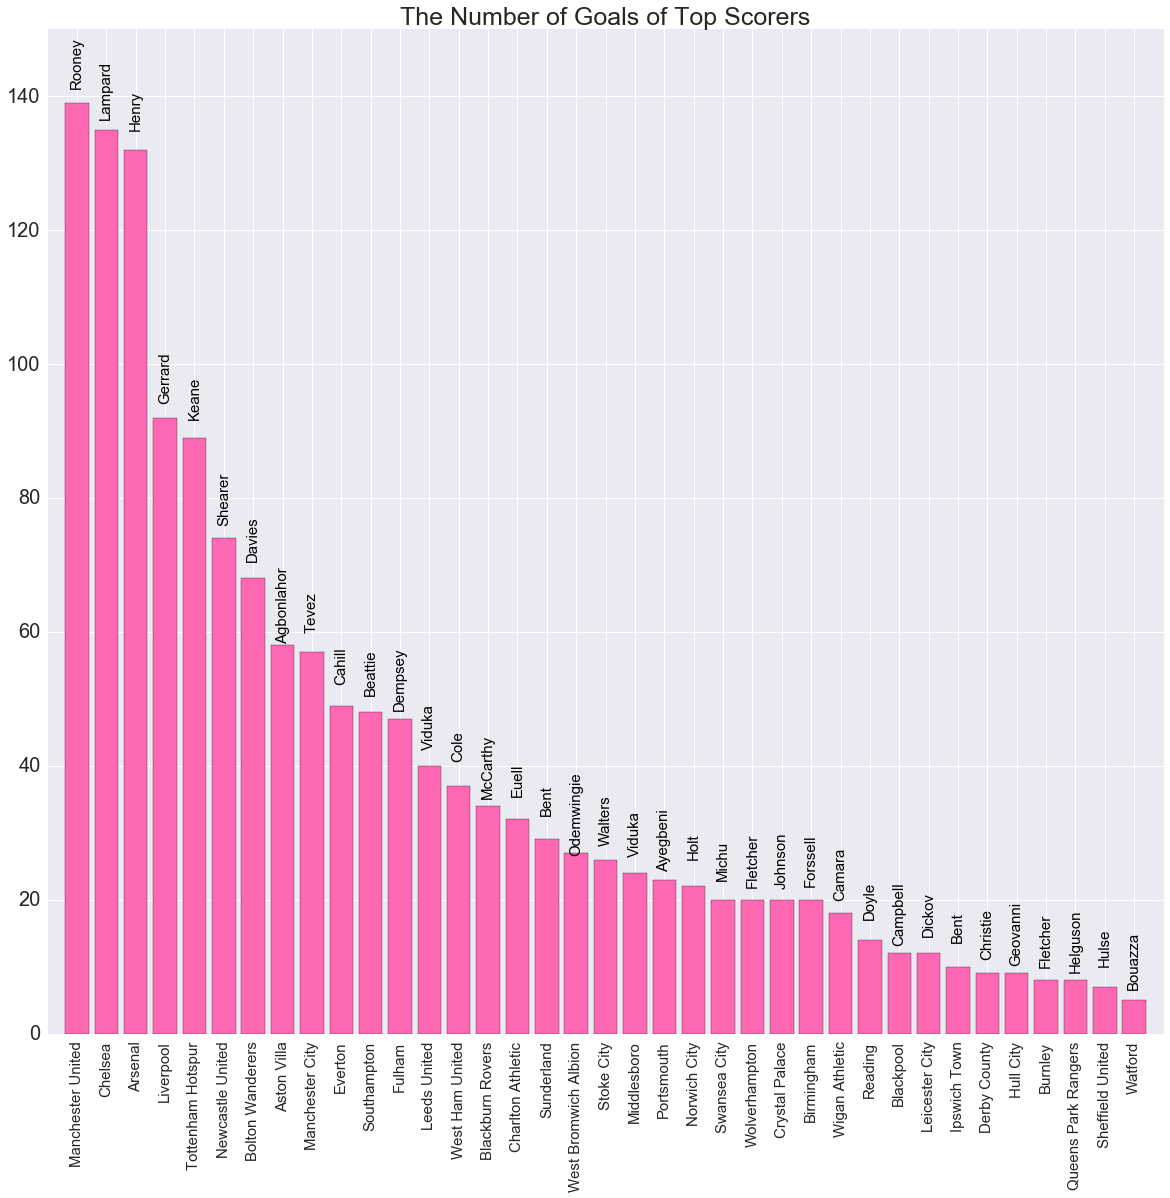

In [41]:
plt.figure(figsize=(20,18))

c = 0

for i in temp2:
    
    plt.bar(c,temp1[i],align="center", color = 'hotpink')#, label = 'number of goals')#, label = 'm')
    
    plt.xticks(range(len(temp2)),temp2,rotation=90,ha='center',size = 15)#,va="center")
    plt.yticks(size = 20)
    plt.text(c, temp1[i]+6, team_top_scorer[i].keys()[0], ha="center", va="center"
             , rotation=90,
            size=15,color = 'black')
    
    c+=1
    
plt.ylim(0,150)
plt.xlim(-1,len(temp2))

plt.title('The Number of Goals of Top Scorers',size = 25)
# plt.legend()
plt.grid(True)
savefig('The Number of Goals of Top Scorers.png')

In [12]:
# save the dictionary in a json format.

with open('./data/team_top_scorer.json', 'w') as outfile:
    json.dump(team_top_scorer, outfile)